In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/MitcaelArcher/DATA201/main/DATA%20201%20Capstone%20Project.csv")
df.drop(index=df.index[-1],axis=0,inplace=True)
#This is reading the CSV and dropping the last row which was the totals

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df
#This is looking at all columns - the first 5 and last 5 rows

,STORE,STORE NAME,INTERNAL_PO,PO,ARTICLE,DESCRIPTION,Sum of RETAIL,Sum of QTY_ORDERED,Sum of EXT_RETAIL_ORDERED,Sum of QTY_RECEIVED,Sum of EXT_RETAIL_RECEIVED,Sum of QTY_BALANCE,Sum of EXT_RETAIL_BALANCE
0,334039,0039-LOS ANGELES,6000149427_1,16163.0,762185794.0,MARINE /SIZE 34 VERY BIS MULTISTRASS,448,1,448,1,448,0,0
1,334039,0039-LOS ANGELES,6000149427_1,16163.0,762190733.0,NOIR /L STOCKHOLM COTON FLAMME SPI,148,2,296,2,296,0,0
2,334039,0039-LOS ANGELES,6000149427_1,16163.0,762199106.0,NOIR /UNIQUE ROCK GRAINED LEATHER,298,1,298,1,298,0,0
3,334039,0039-LOS ANGELES,6000149427_1,16163.0,762207222.0,NOIR /UNIQUE ROCK NANO SAVAGE,248,1,248,1,248,0,0
4,334039,0039-LOS ANGELES,6000149427_1,16163.0,762216099.0,NOIR /XS MARKUS WS STARS,468,1,468,1,468,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74591,334585,0585-COPLEY PLACE,6001243410_1,20158.0,762305529.0,NOIR /W38 CARA HIGH SUEDE,798,2,1596,0,0,2,1596
74592,334585,0585-COPLEY PLACE,6001243410_1,20158.0,762305530.0,NOIR /W39 CARA HIGH SUEDE,798,2,1596,0,0,2,1596
74593,334585,0585-COPLEY PLACE,6001243410_1,20158.0,762305531.0,NOIR /W40 CARA HIGH SUEDE,798,1,798,0,0,1,798
74594,334585,0585-COPLEY PLACE,6001243410_1,20158.0,762305532.0,NOIR /W41 CARA HIGH SUEDE,798,1,798,0,0,1,798


**Question**: 
How many POs have been shipped from the warehouse to stores and what is the total amount of POs and units that have been received?

How many POs are left to be received and what are the top 5 stores with the most POs left open? 

(An open PO is defined as 0 units being received and a closed PO must have at least 1 unit received)

In [ ]:
df.shape
#This is showing the total rows and columns of the data

(74596, 13)

In [ ]:
df.columns
#Displaying the column names

Index(['STORE', 'STORE NAME', 'INTERNAL_PO', 'PO', 'ARTICLE', 'DESCRIPTION',
       'Sum of RETAIL', 'Sum of QTY_ORDERED', 'Sum of EXT_RETAIL_ORDERED',
       'Sum of QTY_RECEIVED', 'Sum of EXT_RETAIL_RECEIVED',
       'Sum of QTY_BALANCE', 'Sum of EXT_RETAIL_BALANCE'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'Sum of RETAIL':'Retail $', 'Sum of QTY_ORDERED':'QTY Ordered', 'Sum of EXT_RETAIL_ORDERED':'Retail $ Ordered', 'Sum of QTY_RECEIVED':'QTY Received', 'Sum of EXT_RETAIL_RECEIVED':'Retail $ Received','Sum of QTY_BALANCE':'QTY Balance', 'Sum of EXT_RETAIL_BALANCE':'Retail $ Balance'}, inplace = False)
#This is changing the name of some columns

In [ ]:
df.columns
#Displaying the column names after changing the names

Index(['STORE', 'STORE NAME', 'INTERNAL_PO', 'PO', 'ARTICLE', 'DESCRIPTION',
       'Retail $', 'QTY Ordered', 'Retail $ Ordered', 'QTY Received',
       'Retail $ Received', 'QTY Balance', 'Retail $ Balance'],
      dtype='object')

In [ ]:
df.dtypes
#This is showing me the data types of each column

STORE                 object
STORE NAME            object
INTERNAL_PO           object
PO                   float64
ARTICLE              float64
DESCRIPTION           object
Retail $               int64
QTY Ordered            int64
Retail $ Ordered       int64
QTY Received           int64
Retail $ Received      int64
QTY Balance            int64
Retail $ Balance       int64
dtype: object

In [ ]:
df = df.astype({"INTERNAL_PO": 'str', "PO": 'str',"ARTICLE": 'str'})
#This is changing the data type from Float to string

In [ ]:
df.dtypes
#This is showing me the data types of each column after changing some

STORE                object
STORE NAME           object
INTERNAL_PO          object
PO                   object
ARTICLE              object
DESCRIPTION          object
Retail $              int64
QTY Ordered           int64
Retail $ Ordered      int64
QTY Received          int64
Retail $ Received     int64
QTY Balance           int64
Retail $ Balance      int64
dtype: object

In [ ]:
df['PO'] = df['PO'].astype(str).replace('\.0', '', regex=True)
df['ARTICLE'] = df['ARTICLE'].astype(str).replace('\.0', '', regex=True)
#This is removing the decimal from the string

In [ ]:
df
#This is looking at all columns - the first 5 and last 5 rows again

,STORE,STORE NAME,INTERNAL_PO,PO,ARTICLE,DESCRIPTION,Retail $,QTY Ordered,Retail $ Ordered,QTY Received,Retail $ Received,QTY Balance,Retail $ Balance
0,334039,0039-LOS ANGELES,6000149427_1,16163,762185794,MARINE /SIZE 34 VERY BIS MULTISTRASS,448,1,448,1,448,0,0
1,334039,0039-LOS ANGELES,6000149427_1,16163,762190733,NOIR /L STOCKHOLM COTON FLAMME SPI,148,2,296,2,296,0,0
2,334039,0039-LOS ANGELES,6000149427_1,16163,762199106,NOIR /UNIQUE ROCK GRAINED LEATHER,298,1,298,1,298,0,0
3,334039,0039-LOS ANGELES,6000149427_1,16163,762207222,NOIR /UNIQUE ROCK NANO SAVAGE,248,1,248,1,248,0,0
4,334039,0039-LOS ANGELES,6000149427_1,16163,762216099,NOIR /XS MARKUS WS STARS,468,1,468,1,468,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74591,334585,0585-COPLEY PLACE,6001243410_1,20158,762305529,NOIR /W38 CARA HIGH SUEDE,798,2,1596,0,0,2,1596
74592,334585,0585-COPLEY PLACE,6001243410_1,20158,762305530,NOIR /W39 CARA HIGH SUEDE,798,2,1596,0,0,2,1596
74593,334585,0585-COPLEY PLACE,6001243410_1,20158,762305531,NOIR /W40 CARA HIGH SUEDE,798,1,798,0,0,1,798
74594,334585,0585-COPLEY PLACE,6001243410_1,20158,762305532,NOIR /W41 CARA HIGH SUEDE,798,1,798,0,0,1,798


In [ ]:
df2 = df.groupby(['STORE NAME','INTERNAL_PO', 'PO'])['QTY Received'].sum()
#This is grouping the data based on the Store Name, PO #'s and Sum of Qty Received

In [ ]:
df2
#This is showing the sum of the quantity received of each PO

STORE NAME         INTERNAL_PO   PO   
0039-LOS ANGELES   6000149427_1  16163    139
                   6000159816_1  16278      4
                   6000161524_1  16193    102
                   6000167865_1  16308      3
                   6000180207_1  16340     46
                                         ... 
0585-COPLEY PLACE  6001093484_1  19778     55
                   6001113551_1  19785    148
                   6001196802_1  20076      0
                   6001243174_1  20148      0
                   6001243410_1  20158      0
Name: QTY Received, Length: 3884, dtype: int64

In [ ]:
TotalPOs=len(df.INTERNAL_PO.unique())
print(TotalPOs,"Total POs")
#This is showing the total amount of POs

3884 Total POs


In [ ]:
SumOfOpen = df2.sum(axis=0)
print(SumOfOpen, "Units Received")
#This is showing the amount of units Received

113513 Units Received


In [ ]:
df3 = df2[df2<=0]
#This is filetering all POs that are showing atleast 1 unit received

In [ ]:
df3
#This is showing me the dataframe with only POs with 0 units received

STORE NAME           INTERNAL_PO   PO   
0039-LOS ANGELES     6001113536_1  19986    0
                     6001121719_1  19990    0
                     6001142416_1  20009    0
                     6001156714_1  20048    0
                     6001207072_1  20085    0
                                           ..
0581-ORLANDO OUTLET  6001227205_1  20131    0
0585-COPLEY PLACE    6001068557_1  19768    0
                     6001196802_1  20076    0
                     6001243174_1  20148    0
                     6001243410_1  20158    0
Name: QTY Received, Length: 257, dtype: int64

In [ ]:
df4 = df3.groupby(['STORE NAME']).count().sort_values(ascending=False)
#This is creating a new dataframe to show the store names and amount of POs that they have "Open"

In [ ]:
df4
#This is displaying the stores and their count of open POs

STORE NAME
0552-BLM LENOX                 12
0400-CABAZON OUTLET             9
0180-BLM SAN FRANCISCO          8
0325-CAMARILLO OUTLET           7
0505-BLM VALLEY FAIR            7
0039-LOS ANGELES                6
0516-VALLEYFAIR                 6
0366-BLM BOCA RATON             6
0382-CENTURY CITY               6
0398-NEWPORT                    6
0433-LAS VEGAS OUTLET           6
0322-LIVERMORE OUTLET           6
0287-MIAMI LINCOLN ROAD         6
0507-BOCA RATON                 6
0368-BLM STANFORD               6
0191-BLM ROOSEVELT FIELD        6
0201-BLM MIAMI                  6
0266-ASPEN                      6
0192-BLM CENTURY CITY           6
0373-BLM FASHION VALLEY         5
0580-CARLSBAD OUTLET            5
0376-BLM NORTH MICHIGAN         5
0576-BLM NEWPORT BEACH          5
0518-RIVER OAKS                 5
0289-SAWGRASS OUTLET            5
0504-BLM NORWALK                5
0216-BLM CHESTNUT HILL          5
0367-BLM ORLANDO                5
0554-TAMPA                      5
033

In [ ]:
SumOfOpen = df4.sum(axis=0)
print(SumOfOpen, "Open POs")
#This is showing the amount of POs that are Open

257 Open POs


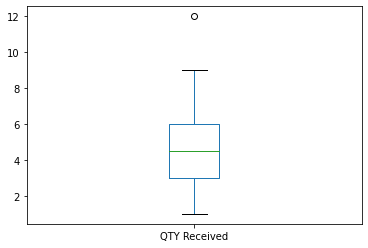

In [ ]:
df4.plot(kind='box')
#This is a box plot of all stores count of POs with 0 units received - Meaning "Open"

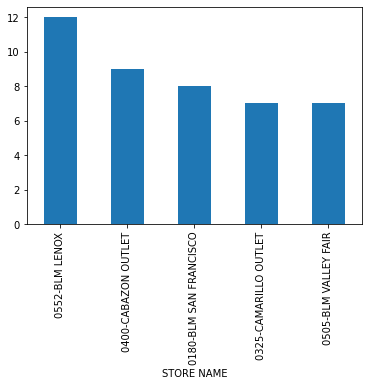

In [ ]:
Top5=df4.nlargest(5)
#This is filtering the top 5 stores with the most POs "Open"
Top5.plot(kind = 'bar', x = 'Store Name', y = 'Number of Open POs')
#This is plotting the top 5 stores with the most POs "Open"

My capstone project is analyzing the POs that have been loaded to our MPOS system (KWI) for our stores to complete the intake of merchandise that was received. During my analysis, I was able to identify that based on the timeframe that I pulled the data from, there has been a total of 3,884 total POs loaded to the KWI system for the stores to receive. Of that total of POs loaded there is still currently **257 POs open to date**. Therefore, the total of POs that have been received is 3,627 POs with a total of 113,513 units. The top 5 stores with the most Open POs are BLM Lenox (Atlanta, GA) - **12 POs Open**, Cabazon Outlet (Cabazon, CA) - **9 POs Open**, BLM San Francisco (San Francisco, CA) - **8 POs Open**, Camarillo Outlet (Camarillo, CA) - **7 POs Open**, and BLM Valley Fair (Santa Clara, CA) - **7 POs Open**. 

This is useful to my company because it is a way to ensure stores are compliant with receiving their deliveries into the MPOS system in a timely manner. This ensures that we (corporate) has complete visibility of their stock on hand and allows us to allocate items based on their inventory levels.